In [1]:
#|hide
%load_ext autoreload
%autoreload 2

# molcluster
> A collection of tools to cluster molecules for cheminformatics applications.

## How to use

pip install molcluster

You can use any function to generate descriptors for the molecules in the dataset. For instance, we could use [Morgan fingerprints](https://pubs.acs.org/doi/10.1021/ci100050t) from [RDkit](https://www.rdkit.org/docs/GettingStartedInPython.html) to generate a vector of 1024 bits for each molecule. 

In [15]:
#| hide
from rdkit import Chem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from molcluster.unsupervised_learning.clustering import KMeansClustering, HDBSCANClustering, ButinaClustering, HierarchicalClustering
from molcluster.unsupervised_learning.transform import UMAPTransform, PCATransform

In [4]:
data = pd.read_csv('../data/fxa_processed.csv')

In [5]:
X = np.array([Chem.AllChem.GetMorganFingerprintAsBitVect(x, radius=1024) for x in list(map(Chem.MolFromSmiles, data.processed_smiles.values))])

# Dimensionality reduction

## Principal component analysis (PCA)

In [6]:
pca_reducer = PCATransform(X)

In [7]:
pca_embeddings = pca_reducer.reduce(n_components=2)
pca_embeddings[0:5]

array([[1.2142797 , 0.46797618],
       [1.44474151, 0.64233027],
       [1.51234623, 0.87651611],
       [3.77443183, 1.29613805],
       [3.654247  , 1.80719829]])

## UMAP

In [8]:
umap_reducer = UMAPTransform(X)

In [29]:
umap_embeddings = umap_reducer.reduce(n_neighbors=50, min_dist=0.25, metric='euclidean')
umap_embeddings[0:5]

array([[ 1.5952768 ,  4.4337296 ],
       [ 1.5278653 ,  4.5167828 ],
       [ 1.3860604 ,  4.543414  ],
       [ 1.7233835 , -1.6080631 ],
       [ 0.79702693, -1.1479477 ]], dtype=float32)

# Clustering

## Kmeans clustering with 10 clusters

In [10]:
clustering_kmeans = KMeansClustering(X)
labels = clustering_kmeans.cluster(n_clusters=10)
labels[0:5]

array([0, 0, 0, 3, 3], dtype=int32)

### Using the elbow method to select the optimal number of clusters

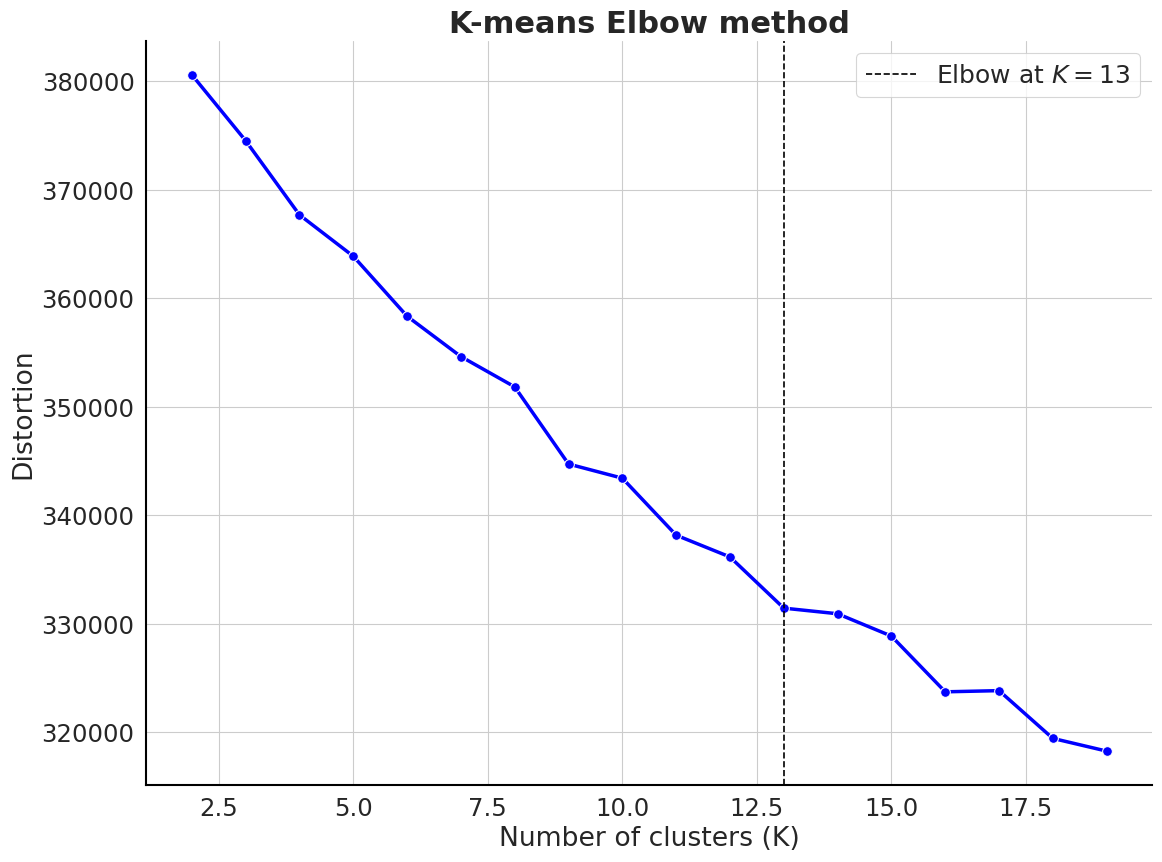

In [11]:
clustering_kmeans.elbow_method(n_clusters=np.arange(2, 20))

## Butina clustering with similarity threshold > 0.7

In [12]:
mol_list = data.processed_smiles.values

In [27]:
clustering_butina = ButinaClustering(mol_list)
labels = clustering_butina.cluster(sim_cutoff=0.7)
labels[0:5]

Calculating Fingerprints:   0%|          | 0/3503 [00:00<?, ?it/s]

[34, 34, 34, 1, 131]

## HDBSCAN clustering

In [ ]:
clustering_hdbscan = HDBSCANClustering(X)
labels = clustering_hdbscan.cluster(min_cluster_size=5,min_samples=1,metric='euclidean')

In [ ]:
np.unique(labels)[0:5]

## Agglomerative clustering (e.g. using Ward's method)

In [ ]:
clustering_agg = HierarchicalClustering(X)

In [ ]:
labels = clustering_agg.cluster(n_clusters=None, distance_threshold=0.25, linkage='ward')
labels[0:5]

### Plotting a dendrogram

In [ ]:
clustering_agg.plot_dendrogram(truncate_mode="level", p=5)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()